<a href="https://colab.research.google.com/github/fadiljaleel/Iris_KNN_AcuracyScore_Graph/blob/main/2_Iris_KNN_AcScore_Graph_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### First, we need to import numpy and pandas libraries, and convert the required data file into dataframe.
### i have attached the document link(Data File) above, for your reference.

In [ ]:
import numpy as np
import pandas as pd

df=pd.read_csv("/content/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## To get all the columns from dataframe, we need to use 
### **Dataframe.columns**

In [ ]:
#columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## To access the first n rows of a dataframe or series, we use
### **Dataframe.head(n)** If n is not provided then, default value is 5.

In [ ]:
#head
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## To show last n rows of a dataframe or series, we use  
### **Dataframe.tail(n)** If n is not provided, then default value is 5.

In [ ]:
#tail
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


##to obtain the shape of a DataFrame.
###synatx : Dataframe.shape
 For example: In this DataFrame, it say's (50, 16) , this implies that the DataFrame is made up of 150 rows and 6 columns of data.

In [ ]:
#shape
df.shape

(150, 6)

## Now we have to check, if there is any missing values in each column.

In [ ]:
#Find Missing Value
print(df.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## Now we have to remove column which is not needed for our KNN algorithm.
### Here,we remove column 'Id' 

In [ ]:
df1=df.drop(['Id'],axis=1)
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Now we are creating input and output labels. For that, we have to split Data into 2 variables. (Example = 'x' for input label and 'y' for output label)
####In input variable 'x', we insert input columns according to our dataframe. and in output variable 'y', we insert result/output column.

In [ ]:
# Splited Data x and y

x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### Now, we convert 'x' and 'y' into training and testing data, For that we import train_test_split from sklearn model selection. 
#### After that we have to assign the amount of data to be used for testing in percentage value.

In [ ]:
# split data to Train and Test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
y_test

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [ ]:
y_test

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

#### Now we need to convert the input label 'x' data into standard scale; otherwise, machine will depend on Columns having higher value and it will affect the prediction. 
#### For that, we import standardscaler from sklearn preprocessing. 
#### We initially create an object of the StandardScaler() function. **scalar=StandardScalar()** 
#### Further, we use fit_transform() along with the assigned object to transform the data and standardize it. Since the input data is x_train, **scalar.fit(x_train)**



In [ ]:
# Standared Scalar = to make all column value in same range   z=(x-u)/s)  u=trainig data
# s= standard Deviation of Training Data , x= value

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)
x_test

array([[ 1.01038788,  0.08931339,  0.54401114,  0.461803  ],
       [ 0.07772214, -0.13941602,  0.7691192 ,  0.86476129],
       [ 1.24355432,  0.08931339,  0.7691192 ,  1.53635844],
       [ 1.59330397, -0.13941602,  1.1630583 ,  0.59612243],
       [-0.03886107, -1.05433362,  0.15007204,  0.0588447 ],
       [ 0.66063823, -0.59687482,  1.05050427,  1.40203901],
       [-0.03886107, -0.82560422,  0.7691192 ,  0.99908072],
       [ 1.24355432,  0.08931339,  0.93795024,  1.26771958],
       [-0.97152681,  0.54677219, -1.31313034, -1.2843496 ],
       [-1.67102611, -0.13941602, -1.36940735, -1.2843496 ],
       [-0.85494359,  1.00423099, -1.31313034, -1.2843496 ],
       [ 0.54405501,  0.77550159,  1.05050427,  1.67067787],
       [ 0.19430536,  0.77550159,  0.43145711,  0.59612243],
       [-1.78760933, -0.13941602, -1.48196138, -1.41866904],
       [-0.73836038,  0.77550159, -1.31313034, -1.2843496 ],
       [ 0.07772214,  0.31804279,  0.60028815,  0.86476129],
       [-1.08811003, -1.

In [ ]:
y_test

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

## Implementation of the K-NN algorithm
### Now we have to create a model from this training and testing data,for that we import KNeighbors classifier from sklearn neighbors. Then, we assign KNeighbors to an object and create the model using fit,then we use the model to predict the output.


In [ ]:
# Step 4 = Create a Machine Learning Model
from sklearn.neighbors import KNeighborsClassifier
classifer=KNeighborsClassifier(n_neighbors=5)
classifer.fit(x_train,y_train)    # .fit for training data(x,y)
y_pred=classifer.predict(x_test)
print(y_pred)

print(classifer.predict([[7.3,2.9,6.3,1.8]]))

['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa']
['Iris-virginica']


### To get the Accuracy Score and Graphical Representation, we need to test the performance of the model. 
### For this, we use confusion matrix and accuracy of the model.


In [ ]:
# Accuracy Score

from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
result=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
print(result)
print(score)    #best score (0.65 - 0.90)

[[15  0  0]
 [ 0 14  0]
 [ 0  1 15]]
0.9777777777777777


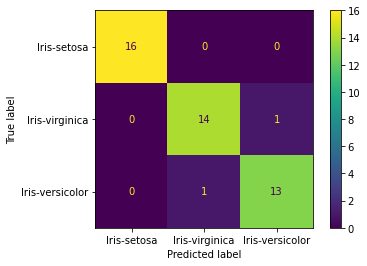

In [ ]:
# Graphical Representation of Confusion Metrics
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
labels=['Iris-setosa','Iris-virginica','Iris-versicolor']
result=confusion_matrix(y_test,y_pred)
cm=ConfusionMatrixDisplay(result,display_labels=labels)
cm.plot()